In [36]:
import pylab 
import numpy as np 
import scipy.optimize


In [1]:
import requests
import json 

# Data displayed in https://datadashboard.health.gov.il/COVID-19


headers = {
    'Accept': 'application/json, text/plain, */*',
    'Content-Type': 'application/json',}

data = {
   "requests":[
      {
         "id":"8",
         "queryName":"testResultsPerDate",
         "single":False,
         "parameters":{

         }
      }
   ]
}

response = requests.post('https://datadashboardapi.health.gov.il/api/queries/_batch', 
                         headers=headers, 
                         data=json.dumps(data))


res = response.json()

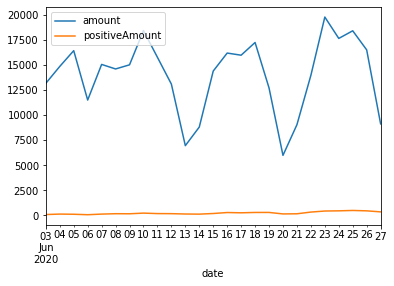

In [9]:
import pandas as pd 



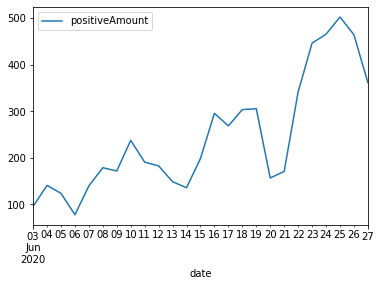

In [10]:
df.plot(y="positiveAmount")

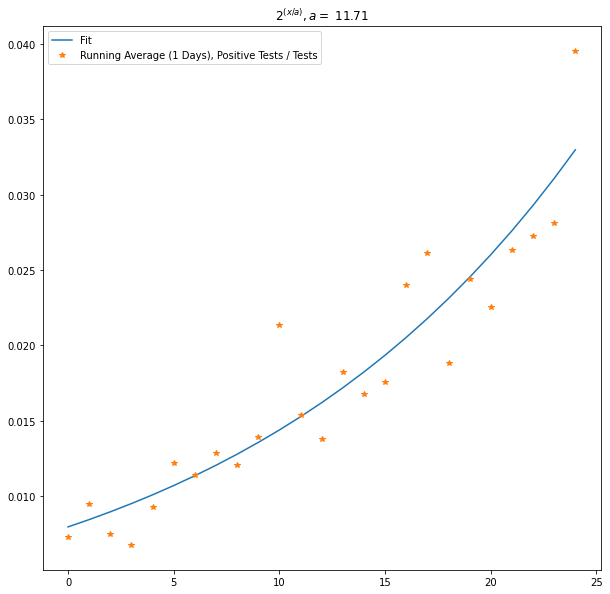

In [55]:
df = pd.DataFrame.from_records(res[0]["data"])
df["date"] = pd.to_datetime(df["date"])

second_wave_start = pd.to_datetime('2020-06-02').date()

df = df.set_index("date")
df = df[df.index.date > second_wave_start]

win_size=1


df["ratio"] = (df["positiveAmount"]/  df["amount"]).rolling(window=win_size, center=True).mean()

df = df.reset_index()

params, _ = scipy.optimize.curve_fit(lambda x, a, b, c: a * (2 ** (x*b)) + c , df.ratio.dropna().index, df.ratio.dropna())



pylab.figure(figsize=(10,10))
pylab.plot(df.index, params[0] * 2**(params[1] * df.index) + params[2], label="Fit")
pylab.plot(df.ratio.dropna(), "*", label="Running Average (%d Days), Positive Tests / Tests" % (win_size))

pylab.title("$2^{(x/a)}, a=$ %.2f" % (1/params[1]))
pylab.legend()




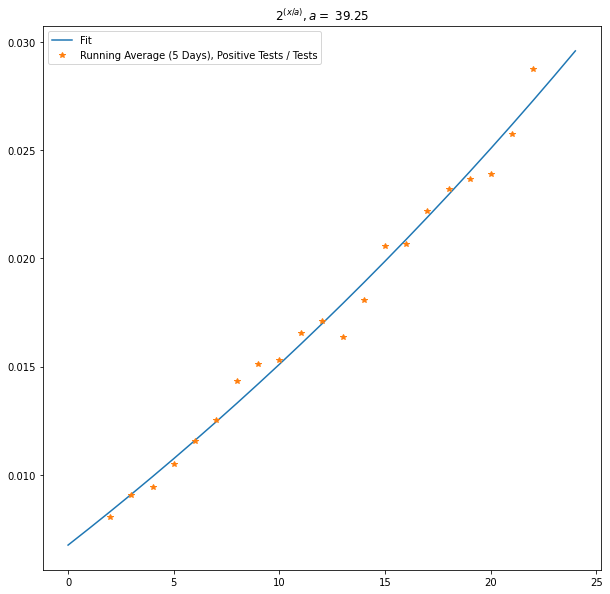

In [56]:
df = pd.DataFrame.from_records(res[0]["data"])
df["date"] = pd.to_datetime(df["date"])

second_wave_start = pd.to_datetime('2020-06-02').date()

df = df.set_index("date")
df = df[df.index.date > second_wave_start]

win_size=5


df["ratio"] = (df["positiveAmount"]/  df["amount"]).rolling(window=win_size, center=True).mean()

df = df.reset_index()

params, _ = scipy.optimize.curve_fit(lambda x, a, b, c: a * (2 ** (x*b)) + c , df.ratio.dropna().index, df.ratio.dropna())



pylab.figure(figsize=(10,10))
pylab.plot(df.index, params[0] * 2**(params[1] * df.index) + params[2], label="Fit")
pylab.plot(df.ratio.dropna(), "*", label="Running Average (%d Days), Positive Tests / Tests" % (win_size))

pylab.title("$2^{(x/a)}, a=$ %.2f" % (1/params[1]))
pylab.legend()




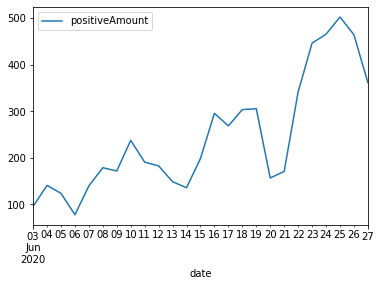

In [41]:
df.plot(y="positiveAmount", x="date")

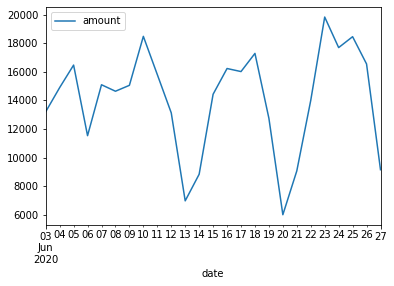

In [40]:
df.plot(x="date", y="amount")

In [ ]:
df.to_csv("TestResuy")